# The Sparks Foundation: Task 1 -  Prediction using supervised Machine Learning (Level - Beginner)

# GRIP (Graduate Rotational Internship Program) November 2022

# Name : Vaishnavi Rathore

## Domain: Data Science and Buisness Analytics

## Problem Statement:

Prediction using supervised Machine Learning. Predict the percentage of an student based on the no. of study hours. What will be predicted score if a student studies for 9.25 hrs./day?

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
url='http://bit.ly/w-data'
df= pd.read_csv(url)
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


<function matplotlib.pyplot.show(close=None, block=None)>

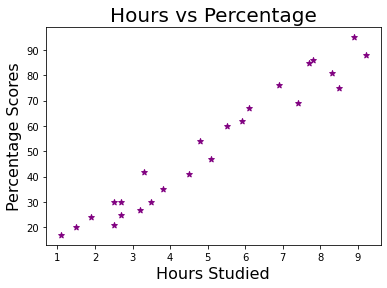

In [41]:
%matplotlib inline
plt.scatter(df['Hours'],df['Scores'],color='purple', marker='*')
plt.title('Hours vs Percentage', fontsize='20')
plt.xlabel('Hours Studied', fontsize='16')
plt.ylabel('Percentage Scores', fontsize='16')
plt.show

#### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

## preparing the data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [60]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

print("Training complete")

Training complete


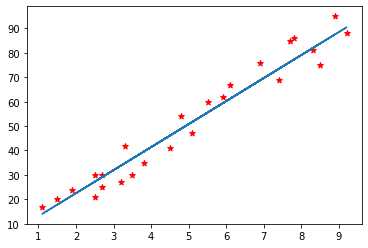

In [70]:
#plotting the regression line
Line= reg.coef_ *X+reg.intercept_

# Plotting for the test data
plt.scatter(X,y,marker='*', color='red')
plt.plot(X,Line)
plt.show()

## Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [73]:
print(X_test) # Testing data - In Hours
y_pred = reg.predict(X_test) # Predicting the scores

[[6.9]
 [4.8]
 [3.2]
 [8.9]
 [2.7]]


In [75]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,76,68.749873
1,54,48.928581
2,27,33.826644
3,95,87.627294
4,30,29.107288


In [77]:
reg.score(X_test,y_test)

0.9476809131900725

## what will be the predicted score if a student studies for 9.25 hr/day?

In [82]:
# You can also test with your own data
hours = 9.25
own_pred = reg.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 90.93084225280325


## Hence, the predicted score if a student studies for 9.25 hr/day is 90.93

## Evaluating the model

In [81]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 5.482721712538226
